### Attom data

In [62]:
import requests
import pandas as pd
import json 

In [63]:
API_KEY = "e9c5f6cb46622d78ca0bc8b3d3033474"
BASE_URL = "https://api.gateway.attomdata.com/propertyapi/v1.0.0/property/basicprofile"

In [64]:
params = {
   "postalcode": "82009",
   "pagesize": 500
}
headers = {
   "accept": "application/json",
   "apikey": API_KEY
}

In [65]:
response = requests.get(url, headers=headers, params=params)

In [66]:
if response.status_code == 200:
    data = response.json()
    
    # Normalize JSON to flat table
    properties = data.get("property", [])
    df_attom = pd.json_normalize(properties)
    
    # Save raw ATTOM data
    df_attom.to_csv("attom_data.csv", index=False)
    print("✅ ATTOM data saved to attom_data.csv")
    
    # Show first few rows
    df_attom.head()
else:
    print("❌ Error:", response.status_code)
    print(response.text)

✅ ATTOM data saved to attom_data.csv


### Clean ATTOM Data (Drop Unwanted Columns)

In [242]:
df_attom = pd.read_csv("attom_data.csv")
print("ATTOM Columns:", df_attom.columns.tolist())

ATTOM Columns: ['identifier.Id', 'identifier.fips', 'identifier.apn', 'identifier.attomId', 'lot.lotNum', 'lot.lotSize1', 'lot.lotSize2', 'lot.zoningType', 'area.countrySecSubd', 'area.subdName', 'area.censusTractIdent', 'area.censusBlockGroup', 'address.country', 'address.countrySubd', 'address.line1', 'address.line2', 'address.locality', 'address.matchCode', 'address.oneLine', 'address.postal1', 'address.postal2', 'address.postal3', 'location.accuracy', 'location.latitude', 'location.longitude', 'location.distance', 'location.geoid', 'location.geoIdV4.CO', 'location.geoIdV4.CS', 'location.geoIdV4.DB', 'location.geoIdV4.N4', 'location.geoIdV4.PL', 'location.geoIdV4.SB', 'location.geoIdV4.ZI', 'summary.absenteeInd', 'summary.propClass', 'summary.propSubType', 'summary.propType', 'summary.propertyType', 'summary.yearBuilt', 'summary.propLandUse', 'summary.propIndicator', 'summary.legal1', 'utilities.coolingType', 'utilities.heatingType', 'utilities.wallType', 'sale.saleSearchDate', 'sal

In [ ]:
test_df = df_attom

# Drop the unnecessary columns
columns_to_drop = [
    "identifier.fips", "identifier.apn", "identifier.attomId",
    "area_loctype", "area_countrysecsubd", "area_countyuse1", "area_muncode",
    "area_munname", "address_country", "address_countrySubd", "address_line2",
    "address_matchCode", "address_oneLine", "address_postal1",
    "location_latitude", "location_longitude", "location_distance",
    "location_geoid", "location_geoIdV4_CS", "location_geoIdV4_DB",
    "location_geoIdV4_N4", "location_geoIdV4_PL", "location_geoIdV4_SB",
    "location_geoIdV4_ZI", "summary_absenteeInd", "summary_propclass",
    "summary_propsubtype", "summary_propLandUse", "summary_legal1",
    "building_interior_fplccount", "building_construction_condition",
    "building_construction_frameType", "building_summary_bldgsNum",
    "building_summary_view", "vintage_lastModified", "vintage_pubDate",
    "sale_salesearchdate", "sale_saleTransDate", "sale_amount_salerecdate",
    "sale_amount_saledisclosuretype", "sale_amount_saledoctype",
    "sale_amount_saledocnum", "sale_interfamily",
    "sale_resaleornewconstruction", "sale_cashormortgagepurchase",
    "sale_vintage_lastModified", "building_rooms_bathspartial",
    "building_summary_unitsCount", "lot_poolind", "area_srvyRange",
    "area_srvySection", "area_srvyTownship", "sale_foreclosure",
    "area_subdtractnum", "utilities_heatingfuel"
]
test_df = test_df.drop(columns=columns_to_drop, axis=1, errors='ignore')

In [247]:
df_cleaned = df_attom.drop(columns=columns_to_drop, errors="ignore")
print("✅ Columns dropped.")
print("🧮 Shape after cleaning:", df_cleaned.shape)

✅ Columns dropped.
🧮 Shape after cleaning: (500, 120)


In [248]:
# Save cleaned data
df_cleaned.to_csv("attom_cleaned.csv", index=False)
print("✅ Cleaned ATTOM data saved to attom_cleaned.csv")

✅ Cleaned ATTOM data saved to attom_cleaned.csv


In [ ]:
df_cleaned.head()


identifier.Id                               0
identifier.fips                             0
identifier.apn                              0
identifier.attomId                          0
lot.lotNum                                132
                                         ... 
assessment.owner.owner4.fullName          494
assessment.owner.owner4.lastName          494
building.rooms.beds                       497
building.rooms.roomsTotal                 499
assessment.owner.owner4.firstNameAndMi    496
Length: 120, dtype: int64

### Row RentCast Dummy Dataset

In [191]:
import pandas as pd
import numpy as np
import random

In [192]:
np.random.seed(42)
random.seed(42)

In [216]:
def generate_rentcast_data(n=500):
    # Generate address components
    streets = ["Main St", "Elm St", "Maple Ave", "Oak Dr", "Pine Ln"]
    cities = ["Springfield", "Rivertown", "Lakeside", "Hillview", "Brookfield"]
    states = ["CA", "TX", "NY", "FL", "WA"]
    zips = [90210, 73301, 10001, 33101, 98101]

    data = []
    for _ in range(n):
        street_number = random.randint(100, 9999)
        address_line1 = f"{street_number} {random.choice(streets)}"
        address_locality = random.choice(cities)
        address_countrySubd = random.choice(states)
        address_postal1 = random.choice(zips)
        summary_yearbuilt = random.randint(1950, 2022)
        building_size_universalSize = random.randint(500, 4000)
        summary_propType = random.choice(["Single Family", "Multi Family", "Apartment"])
        summary_propIndicator = random.choice(["Primary", "Secondary"])
        sale_amount_saleamt = random.randint(50000, 1000000)
        sale_saleTransDate = pd.to_datetime(
            f"{random.randint(2018, 2023)}-{random.randint(1,12)}-{random.randint(1,28)}"
        )
        building_summary_levels = random.randint(1, 3)
        building_summary_storyDesc = f"{building_summary_levels}-Story"

        # Rent estimate based on size with random per sqft rate
        rent_per_sqft = random.uniform(1.2, 2.0)
        rent_estimate = round(building_size_universalSize * rent_per_sqft, 0)
        rent_range_low = round(rent_estimate * 0.9, 0)
        rent_range_high = round(rent_estimate * 1.1, 0)

        data.append({
            'address_line1': address_line1,
            'address_locality': address_locality,
            'address_countrySubd': address_countrySubd,
            'address_postal1': address_postal1,
            'summary_yearbuilt': summary_yearbuilt,
            'building_size_universalSize': building_size_universalSize,
            'summary_propType': summary_propType,
            'summary_propIndicator': summary_propIndicator,
            'sale_amount_saleamt': sale_amount_saleamt,
            'sale_saleTransDate': sale_saleTransDate,
            'building_summary_levels': building_summary_levels,
            'building_summary_storyDesc': building_summary_storyDesc,
            'rent_estimate': rent_estimate,
            'rent_range_low': rent_range_low,
            'rent_range_high': rent_range_high
        })

    return pd.DataFrame(data)

In [218]:
# Generate the DataFrame
df_dummy_rentcast = generate_rentcast_data(500)

# Verify no nulls
assert df_dummy_rentcast.isnull().sum().sum() == 0, "There are nulls in the dataset!"

# Preview
print(df_dummy_rentcast.head())

    address_line1 address_locality address_countrySubd  address_postal1  \
0  2997 Maple Ave        Rivertown                  FL            10001   
1      921 Oak Dr         Lakeside                  FL            98101   
2     259 Pine Ln      Springfield                  WA            10001   
3    9931 Main St        Rivertown                  CA            90210   
4     4932 Oak Dr         Hillview                  CA            73301   

   summary_yearbuilt  building_size_universalSize summary_propType  \
0               2001                         1064        Apartment   
1               1992                         1943    Single Family   
2               1991                          938    Single Family   
3               1962                         2395        Apartment   
4               1971                         3096    Single Family   

  summary_propIndicator  sale_amount_saleamt sale_saleTransDate  \
0               Primary               396919         2020-01-

In [219]:
df_dummy_rentcast.isnull().sum()

address_line1                  0
address_locality               0
address_countrySubd            0
address_postal1                0
summary_yearbuilt              0
building_size_universalSize    0
summary_propType               0
summary_propIndicator          0
sale_amount_saleamt            0
sale_saleTransDate             0
building_summary_levels        0
building_summary_storyDesc     0
rent_estimate                  0
rent_range_low                 0
rent_range_high                0
dtype: int64

In [195]:
# Generate base fields
addresses = [f"{np.random.randint(100,9999)} Main St" for _ in range(n)]
cities    = np.random.choice(["Springfield","Riverside","Fairview","Greenville"], n)
states    = np.random.choice(["CA","TX","NY","FL","OH"], n)
zips      = np.random.randint(10000,99999, n).astype(str)

years     = np.random.randint(1950, 2025, n)
sqft      = np.random.randint(500, 5000, n)
beds      = np.random.randint(1, 6, n)
baths     = np.random.randint(1, 4, n)
prop_types= np.random.choice(["Apartment","House","Condo","Townhouse"], n)

# Base rent estimate = $0.8–$1.5 per sqft
base_rate = np.random.uniform(0.8, 1.5, n)
rent_est  = (sqft * base_rate).round(0)
rent_low  = (rent_est * 0.9).round(0)
rent_high = (rent_est * 1.1).round(0)

In [196]:
# Assemble into DataFrame
df_rentcast = pd.DataFrame({
    "address_line1":      addresses,
    "address_locality":   cities,
    "address_countrySubd":states,
    "address_postal1":    zips,
    "summary_yearbuilt":  years,
    "building_size_universalSize": sqft,
    "summary_propType":   prop_types,
    "bedrooms":           beds,
    "bathrooms":          baths,
    "rent_estimate":      rent_est,
    "rent_range_low":     rent_low,
    "rent_range_high":    rent_high
})


In [197]:
df_rentcast.to_csv("rentcast_raw.csv", index=False)
print("✅ RentCast dummy data saved to rentcast_raw.csv")
df_rentcast.head()

✅ RentCast dummy data saved to rentcast_raw.csv


,address_line1,address_locality,address_countrySubd,address_postal1,summary_yearbuilt,building_size_universalSize,summary_propType,bedrooms,bathrooms,rent_estimate,rent_range_low,rent_range_high
0,7370 Main St,Springfield,NY,37788,1986,2696,Townhouse,1,3,3748.0,3373.0,4123.0
1,960 Main St,Fairview,CA,58543,1969,4247,Apartment,2,2,4840.0,4356.0,5324.0
2,5490 Main St,Springfield,OH,23919,1975,1151,Apartment,3,1,1190.0,1071.0,1309.0
3,5291 Main St,Fairview,TX,79346,1978,1269,Townhouse,1,2,1718.0,1546.0,1890.0
4,5834 Main St,Springfield,FL,49974,1950,2921,House,1,1,3260.0,2934.0,3586.0


### Data Integration: Read + Align + Combine

In [198]:
import pandas as pd

In [277]:
# Load cleaned ATTOM data and RentCast dummy data
df_attom = pd.read_csv("attom_cleaned.csv")
df_rentcast = pd.read_csv("dummy_rentcast_like_attom.csv")


In [278]:
columns_to_drop = [
    "identifier.fips", "identifier.apn", "identifier.attomId",
    "area.loctype", "area.countrysecsubd", "area.countyuse1", "area.muncode",
    "area.munname", "address.country", "address.countrySubd", "address.line2",
    "address.matchCode", "address.oneLine", "address.postal1",
    "location.latitude", "location.longitude", "location.distance",
    "location.geoid", "location.geoIdV4.CS", "location.geoIdV4.DB",
    "location.geoIdV4.N4", "location.geoIdV4.PL", "location.geoIdV4.SB",
    "location.geoIdV4.ZI", "summary.absenteeInd", "summary.propclass",
    "summary.propsubtype", "summary.propLandUse", "summary.legal1",
    "building.interior.fplccount", "building.construction.condition",
    "building.construction.frameType", "building.summary.bldgsNum",
    "building.summary.view", "vintage.lastModified", "vintage.pubDate",
    "sale.salesearchdate", "sale.saleTransDate", "sale_amount.salerecdate",
    "sale_amount.saledisclosuretype", "sale_amount.saledoctype",
    "sale_amount.saledocnum", "sale.interfamily",
    "sale.resaleornewconstruction", "sale.cashormortgagepurchase",
    "sale.vintage.lastModified", "building.rooms.bathspartial",
    "building.summary.unitsCount", "lot.poolind", "area.srvyRange",
    "area.srvySection", "area.srvyTownship", "sale.foreclosure", "summary.propType", "summary.propIndicator", "sale.saleSearchDate", "sale.transactionIdent", "sale.saleAmountData.saleRecDate", "sale.saleAmountData.saleDisclosureType", "sale.saleAmountData.saleDocType", "sale.saleAmountData.saleDocNum",
    "area.subdtractnum", "utilities.heatingfuel","identifier.Id", "lot.lotNum", "area.countrySecSubd", "area.subdName", "area.censusTractIdent", "area.censusBlockGroup", "address.line1", "location.accuracy", "location.geoIdV4.CO", "summary.propClass"
]

df_attom= df_attom.drop(columns=columns_to_drop, errors="ignore")
df_rentcast= df_rentcast.drop(columns=columns_to_drop, errors="ignore")
# Check result


In [280]:
df_attom.isnull().sum()

lot.lotSize1                                0
lot.lotSize2                                0
lot.zoningType                              0
address.locality                            0
address.postal2                             1
                                         ... 
assessment.owner.owner4.fullName          494
assessment.owner.owner4.lastName          494
building.rooms.beds                       497
building.rooms.roomsTotal                 499
assessment.owner.owner4.firstNameAndMi    496
Length: 73, dtype: int64

In [281]:
# Fill null values in numeric columns with the mean
numeric_cols = df_attom.select_dtypes(include='number').columns
df_attom[numeric_cols] = df_attom[numeric_cols].fillna(df_attom[numeric_cols].mean())

In [282]:
df_attom.isnull().sum()


lot.lotSize1                                0
lot.lotSize2                                0
lot.zoningType                              0
address.locality                            0
address.postal2                             0
                                         ... 
assessment.owner.owner4.fullName          494
assessment.owner.owner4.lastName          494
building.rooms.beds                         0
building.rooms.roomsTotal                   0
assessment.owner.owner4.firstNameAndMi    496
Length: 73, dtype: int64

In [283]:
# Fill null values in categorical columns with the mode
categorical_cols = df_attom.select_dtypes(include='object').columns

for col in categorical_cols:
    mode_value = df_attom[col].mode(dropna=True)
    if not mode_value.empty:
        df_attom[col] = df_attom[col].fillna(mode_value[0])

In [284]:
df_attom.isnull().sum()

lot.lotSize1                              0
lot.lotSize2                              0
lot.zoningType                            0
address.locality                          0
address.postal2                           0
                                         ..
assessment.owner.owner4.fullName          0
assessment.owner.owner4.lastName          0
building.rooms.beds                       0
building.rooms.roomsTotal                 0
assessment.owner.owner4.firstNameAndMi    0
Length: 73, dtype: int64

In [285]:
# Step 1: Find common columns
common_cols = df_attom.columns.intersection(df_rentcast.columns)

# Step 2: Subset both DataFrames to these columns
attom_common = df_attom[common_cols]
rentcast_common = df_rentcast[common_cols]

# Step 3: Concatenate them vertically (stack rows)
combined_df = pd.concat([attom_common, rentcast_common], ignore_index=True)

# Step 4 (optional): Show shape or preview
print(combined_df.shape)
combined_df.head()

(600, 73)


,lot.lotSize1,lot.lotSize2,lot.zoningType,address.locality,address.postal2,address.postal3,summary.propSubType,summary.propertyType,summary.yearBuilt,utilities.coolingType,utilities.heatingType,utilities.wallType,sale.saleAmountData.saleTransType,building.size.bldgSize,building.size.grossSize,building.size.grossSizeAdjusted,building.size.livingSize,building.size.sizeInd,building.size.universalSize,building.rooms.bathsFull,building.rooms.bathsTotal,building.interior.bsmtSize,building.interior.bsmtType,building.interior.fplcCount,building.interior.fplcInd,building.interior.fplcType,building.interior.bsmtFinishedPercent,building.construction.constructionType,building.parking.garageType,building.parking.prkgSize,building.parking.prkgType,building.summary.levels,building.summary.storyDesc,building.summary.viewCode,assessment.assessed.assdImprValue,assessment.assessed.assdLandValue,assessment.assessed.assdTtlValue,assessment.market.mktImprValue,assessment.market.mktLandValue,assessment.market.mktTtlValue,assessment.tax.taxAmt,assessment.tax.taxPerSizeUnit,assessment.tax.taxYear,assessment.improvementPercent,assessment.owner.corporateIndicator,assessment.owner.owner1.fullName,assessment.owner.owner1.lastName,assessment.owner.owner1.firstNameAndMi,assessment.owner.absenteeOwnerStatus,assessment.owner.mailingAddressOneLine,sale.saleAmountData.saleAmt,building.rooms.bathsPartial,assessment.mortgage.FirstConcurrent.trustDeedDocumentNumber,assessment.mortgage.FirstConcurrent.amount,assessment.mortgage.FirstConcurrent.lenderLastName,assessment.owner.owner3.fullName,assessment.owner.owner3.lastName,assessment.owner.owner3.firstNameAndMi,assessment.owner.owner2.fullName,assessment.owner.owner2.lastName,assessment.owner.owner2.firstNameAndMi,assessment.mortgage.SecondConcurrent.amount,assessment.mortgage.SecondConcurrent.trustDeedDocumentNumber,assessment.mortgage.SecondConcurrent.lenderLastName,area.subdTractNum,utilities.heatingFuel,summary.dateOfLastQuitClaim,identifier.multiApn,assessment.owner.owner4.fullName,assessment.owner.owner4.lastName,building.rooms.beds,building.rooms.roomsTotal,assessment.owner.owner4.firstNameAndMi
0,0.172153,7499.0,Residential,CHEYENNE,5548.0,C041,Residential,SINGLE FAMILY RESIDENCE,1979.0,YES,FORCED AIR,WOOD,Resale,1008.0,2496.0,1008.0,1008.0,LIVING SQFT,1008.0,2.0,2.0,1008.000000,FINISHED,1.000000,Y,YES,89.000000,FRAME,"Garage, Attached",480.0,"Garage, Attached",1.0,CONVENTIONAL HOUSE,0,18810.0,3188.0,21998.0,265142.0,44749.0,309891.0,2005.76,1.99,2024.0,85.0,N,JUSTIN CORDSEN,CORDSEN,JUSTIN,O,"4009 CARLA DR, CHEYENNE, WY 82009-5548",280682.907042,1.09375,4.752144e+06,233694.612827,FIRST INTERSTATE BANK,ADRIENNE MURRAY,JOHNSON,TANYA,ALEXANDRIA VIRGINIA MCNAMAR,M,BARBARA J,6929.334483,0000410916,WELLS FARGO BANK NA,10,ELECTRIC,03/03/2016 00:00:00,"MULTIPLE PARCELS CONVEYED, UNKNOWN IMPACT TO APN",DALEN W JURGENS,BOX,3.333333,9.0,DALEN W
1,1.110000,48510.0,Residential,CHEYENNE,5122.0,C030,Residential,CONDOMINIUM,1974.0,YES,HOT WATER,ALUMINUM/VINYL,Resale,8184.0,33164.0,8184.0,8184.0,LIVING SQFT,8184.0,8.0,16.0,1139.948478,FINISHED,1.043103,Y,YES,76.037471,FRAME,"Garage, Attached",420.0,"Garage, Attached",2.0,COMMERCIAL,0,8139.0,319.0,8458.0,183144.0,4515.0,187659.0,598.07,0.07,2024.0,96.0,N,JACOB T PASKERT,PASKERT,JACOB T,O,"4707 HICKORY PL, CHEYENNE, WY 82009-5122",131906.000000,8.00000,7.558500e+05,135859.000000,WYOMING BK&TR,ADRIENNE MURRAY,JOHNSON,TANYA,ALEXANDRIA VIRGINIA MCNAMAR,M,BARBARA J,6929.334483,0000410916,WELLS FARGO BANK NA,10,ELECTRIC,03/03/2016 00:00:00,"MULTIPLE PARCELS CONVEYED, UNKNOWN IMPACT TO APN",DALEN W JURGENS,BOX,3.333333,9.0,DALEN W
2,0.826446,36000.0,Residential,CHEYENNE,8902.0,H056,Residential,SINGLE FAMILY RESIDENCE,1978.0,YES,FORCED AIR,WOOD,Resale,1366.0,2378.0,1366.0,1366.0,LIVING SQFT,1366.0,2.0,2.0,1012.000000,FINISHED,1.000000,Y,YES,100.000000,FRAME,"Garage, Detached",528.0,"Garage, Detached",1.0,CONVENTIONAL HOUSE,0,21640.0,3989.0,25629.0,300742.0,55989.0,356731.0,2202.61,1

In [286]:
combined_df.isnull().sum()

lot.lotSize1                              0
lot.lotSize2                              0
lot.zoningType                            0
address.locality                          0
address.postal2                           0
                                         ..
assessment.owner.owner4.fullName          0
assessment.owner.owner4.lastName          0
building.rooms.beds                       0
building.rooms.roomsTotal                 0
assessment.owner.owner4.firstNameAndMi    0
Length: 73, dtype: int64

### Cleaning Functions & API (FastAPI example)

In [202]:
from fastapi import FastAPI
from pydantic import BaseModel
import pandas as pd
app = FastAPI()


In [203]:
class DataIn(BaseModel):
    data: dict  # Incoming data as JSON dict

def clean_data(df: pd.DataFrame) -> pd.DataFrame:
    # Your cleaning logic here, e.g., drop columns, fix types
    cols_to_drop = [...]  # your list
    df = df.drop(columns=cols_to_drop, errors='ignore')
    # Additional cleaning...
    return df

In [204]:
@app.post("/clean")
def clean_endpoint(input: DataIn):
    df = pd.DataFrame([input.data])
    df_cleaned = clean_data(df)
    return {"cleaned_data": df_cleaned.to_dict(orient="records")}

### Modeling Pipeline + API

In [232]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [289]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
import pandas as pd

categorical_cols = combined_df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = combined_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Convert categorical columns to strings to avoid mixed types
combined_df[categorical_cols] = combined_df[categorical_cols].astype(str)

categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
numerical_transformer = MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_processed = preprocessor.fit_transform(combined_df)

cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = numerical_cols + list(cat_features)

df_processed = pd.DataFrame(X_processed, columns=all_features)

print(df_processed.head())


   lot.lotSize1  lot.lotSize2  address.postal2  summary.yearBuilt  \
0      0.003719      0.003801         0.047796           0.575472   
1      0.027914      0.028088         0.043490           0.528302   
2      0.020599      0.020680         0.081702           0.566038   
3      0.119498      0.119572         0.088890           0.783019   
4      0.005052      0.005134         0.044460           0.443396   

   building.size.bldgSize  building.size.grossSize  \
0                0.046758                 0.053340   
1                0.911545                 1.000000   
2                0.089901                 0.049697   
3                0.145818                 0.112360   
4                0.040974                 0.045191   

   building.size.grossSizeAdjusted  building.size.livingSize  \
0                         0.046758                  0.046758   
1                         0.911545                  0.911545   
2                         0.089901                  0.089901   
3   

In [297]:
# Show full list of column names
pd.set_option('display.max_columns', None)

# Now display all columns
print(df_processed.columns.tolist())
df_processed["sale.saleAmountData.saleAmt"].unique()

['lot.lotSize1', 'lot.lotSize2', 'address.postal2', 'summary.yearBuilt', 'building.size.bldgSize', 'building.size.grossSize', 'building.size.grossSizeAdjusted', 'building.size.livingSize', 'building.size.universalSize', 'building.rooms.bathsFull', 'building.rooms.bathsTotal', 'building.interior.bsmtSize', 'building.interior.fplcCount', 'building.interior.bsmtFinishedPercent', 'building.parking.prkgSize', 'building.summary.levels', 'building.summary.viewCode', 'assessment.assessed.assdImprValue', 'assessment.assessed.assdLandValue', 'assessment.assessed.assdTtlValue', 'assessment.market.mktImprValue', 'assessment.market.mktLandValue', 'assessment.market.mktTtlValue', 'assessment.tax.taxAmt', 'assessment.tax.taxPerSizeUnit', 'assessment.tax.taxYear', 'assessment.improvementPercent', 'sale.saleAmountData.saleAmt', 'building.rooms.bathsPartial', 'assessment.mortgage.FirstConcurrent.trustDeedDocumentNumber', 'assessment.mortgage.FirstConcurrent.amount', 'assessment.mortgage.SecondConcurrent

array([0.27455436, 0.12399498, 0.24706703, 0.33051901, 0.35248203,
       0.27058445, 0.13909373, 0.2582059 , 0.2192163 , 0.2530792 ,
       0.22451706, 0.38404268, 0.13775184, 0.30096715, 0.12147211,
       0.17142045, 0.62742407, 0.22723321, 0.09980256, 0.46640679,
       0.31689775, 0.39530097, 0.17393016, 0.35186473, 0.20529145,
       0.28999728, 0.61161187, 0.35482072, 0.44552052, 0.24350384,
       0.28084695, 0.34425969, 0.3490332 , 0.14790201, 0.26593743,
       0.32554209, 0.24644061, 0.40036087, 0.11381647, 0.32515754,
       0.20251862, 0.17557564, 0.18019938, 0.15310056, 0.19700535,
       0.11700624, 0.23379287, 0.21820432, 0.29235722, 0.4515924 ,
       0.2427823 , 0.1654528 , 0.35543499, 0.35102681, 0.30000678,
       0.15546151, 0.1929048 , 0.3725314 , 0.4567788 , 0.32648627,
       0.19296855, 0.3156935 , 0.17379253, 0.17494214, 0.15799146,
       0.14704992, 0.23186606, 0.23970891, 0.22199925, 0.29916279,
       0.31940241, 0.25045514, 0.18012854, 0.51499907, 0.52179

#### Prepare X and y 

In [300]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Separate features and target from df_processed
X = df_processed.drop(columns=['sale.saleAmountData.saleAmt']).values
y = df_processed['sale.saleAmountData.saleAmt'].values



#### Train models and evaluate

In [301]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42, eval_metric='rmse')
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse:.4f}, R2: {r2:.4f}")

Linear Regression - MSE: 0.0203, R2: 0.4460
Random Forest - MSE: 0.0150, R2: 0.5913
Decision Tree - MSE: 0.0233, R2: 0.3626
XGBoost - MSE: 0.0184, R2: 0.4966


#### Visualize predictions

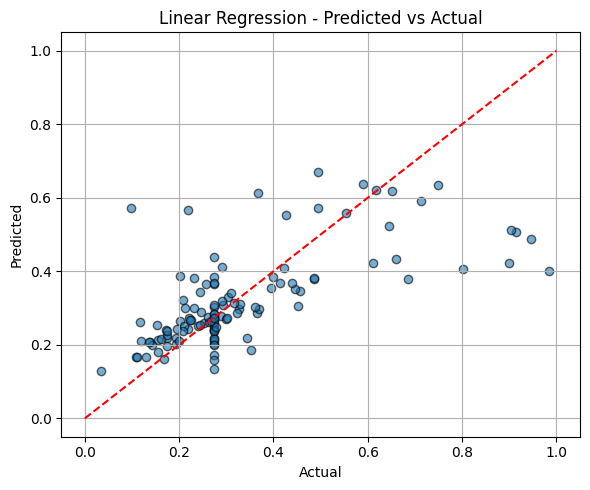

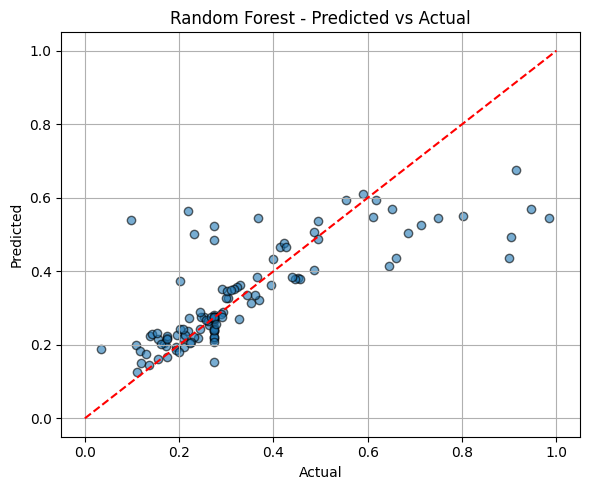

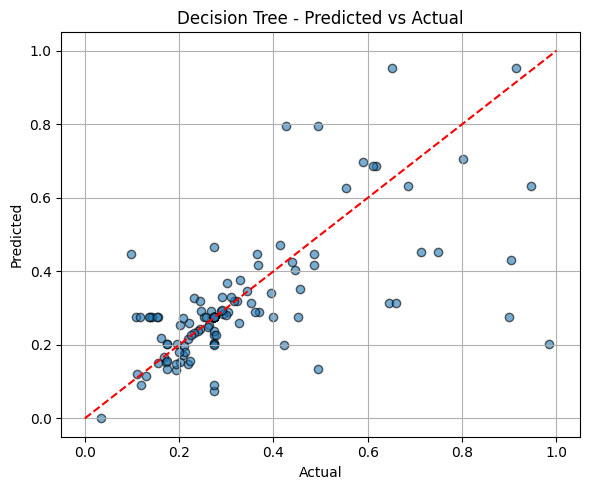

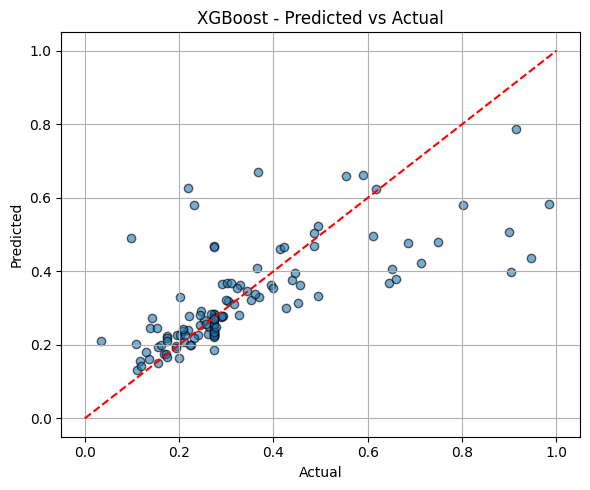

In [302]:
import matplotlib.pyplot as plt

# Loop through each model, train, predict and plot
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.figure(figsize=(6, 5))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
    plt.plot([0, 1], [0, 1], 'r--')  # ideal line (y = x)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name} - Predicted vs Actual")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
